<a href="https://colab.research.google.com/github/uttamk22/AIML/blob/main/Haberman's_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Haberman's Survival Data Set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year
Objective: Classify whether a patient will survive 5 years or longer given the 3 features mentioned above. 


In [2]:

from google.colab import drive 
drive.mount('/content/gdrive', force_remount = True)
input_dir = "/content/gdrive/My Drive/ColabNotebooks/Input"

import warnings
warnings.filterwarnings(action="ignore")


Mounted at /content/gdrive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          306 non-null    int64 
 1   op_year      306 non-null    int64 
 2   axil_nodes   306 non-null    int64 
 3   surv_status  306 non-null    object
dtypes: int64(3), object(1)
memory usage: 9.7+ KB


Survived 5 Years or More    225
Died within 5 Years          81
Name: surv_status, dtype: int64

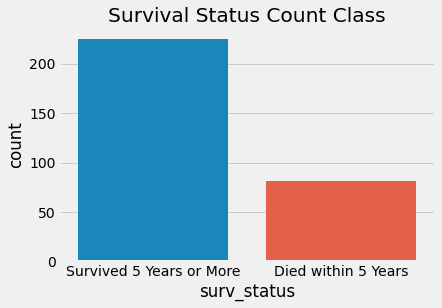

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 

columns = ['age', 'op_year', 'axil_nodes','surv_status']
haberman = pd.read_csv(input_dir+'/haberman.csv', names=columns)
haberman.shape
haberman['surv_status'] = haberman['surv_status'].apply({1:'Survived 5 Years or More', 2: 'Died within 5 Years'}.get)
haberman['op_year'] = haberman['op_year'] + 1900
haberman.head(10)
haberman.info()

sns.countplot(haberman['surv_status'])
plt.title('Survival Status Count Class')
haberman['surv_status'].value_counts()

Observations -

1. 306 Data Points and 4 Features, none has null values 
2. Imbalance Dataset - 2 classes, Class 1 has 225 data points, class 2 has 81 data points

# Bi-Variate Analysis

Scatter plot and Pair plot

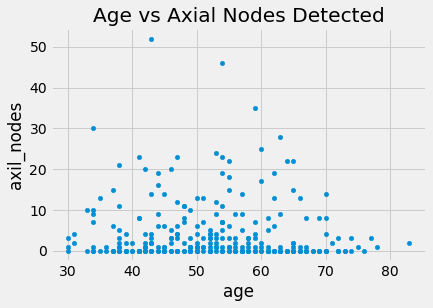

In [7]:

haberman.plot(kind='scatter', x='age' , y='axil_nodes')
plt.title("Age vs Axial Nodes Detected")
plt.show()

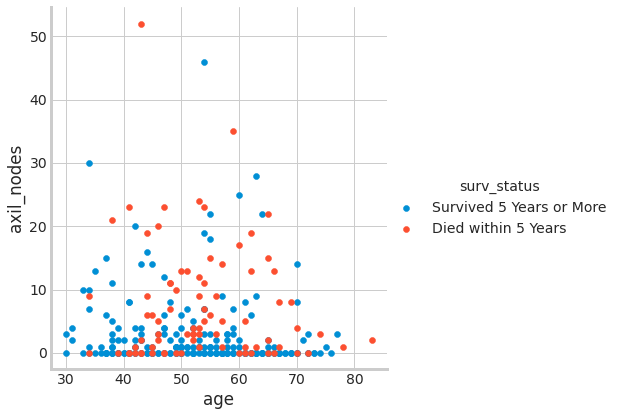

In [35]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='surv_status', height=6).map(plt.scatter, 'age', 'axil_nodes').add_legend()
plt.show()

# **Observation -**

If the age is up to 40 then the greater probability that the patient will survived 5 years or more considering the age vs axil_nodes scatter plot. (even though data is skewed, need to do further analysis)

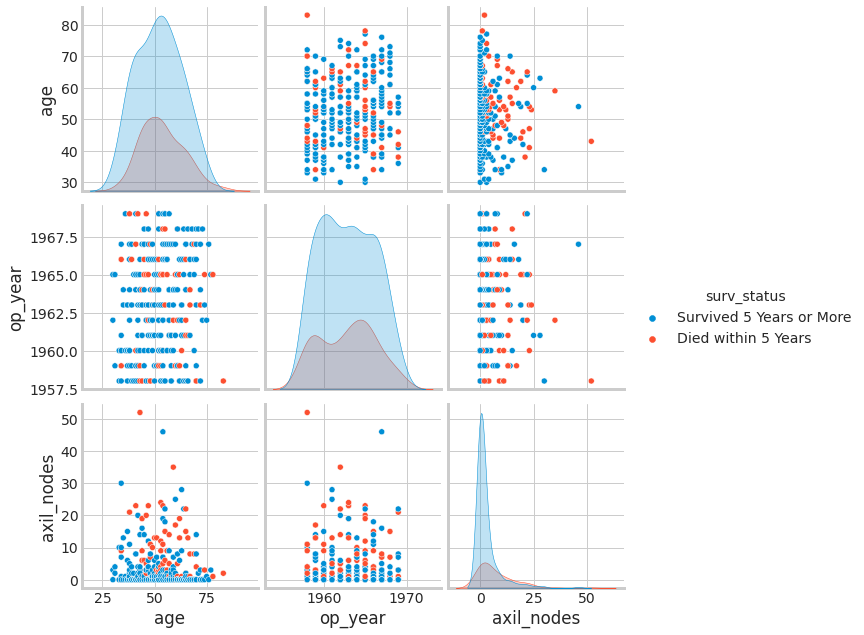

In [36]:
#Bi-variate analysis using pair plots
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='surv_status', height=3)
plt.show()

# **Observations -**

1. There are some clusters aggregated at age vs axil_nodes scatter plot , it seems these two features are good to consider.
2. op_year somewhat gives mixed result , so can't consider this feature to anaylze further.

# Univartiate Analysis -

Histogram , PDF and CDF

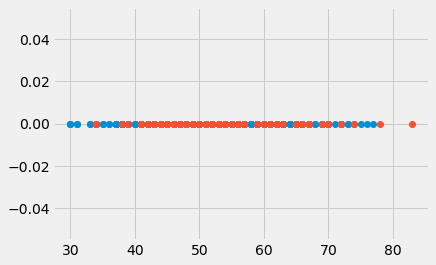

In [23]:
#1-D Scatter plots
import numpy as n
haberman_survived = haberman.loc[haberman['surv_status']== 'Survived 5 Years or More']
haberman_not_survived = haberman.loc[haberman['surv_status']== 'Died within 5 Years']
plt.plot(haberman_survived["age"], np.zeros_like(haberman_survived["age"]), 'o')
plt.plot(haberman_not_survived["age"], np.zeros_like(haberman_not_survived["age"]), 'o')
plt.show()

Observation 

Difficult to analyze with 1-D scatter plot, let's draw histogram and PDFs

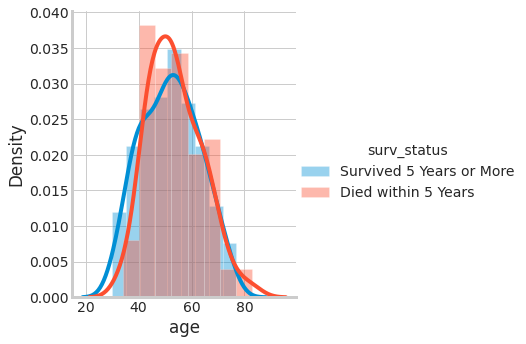

In [25]:
#Histogram and PDFs

sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue='surv_status', height=5).map(sns.distplot, "age").add_legend()
plt.show()

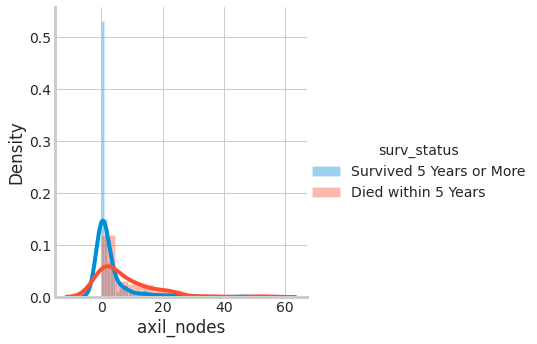

In [26]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue='surv_status', height=5).map(sns.distplot, "axil_nodes").add_legend()
plt.show()

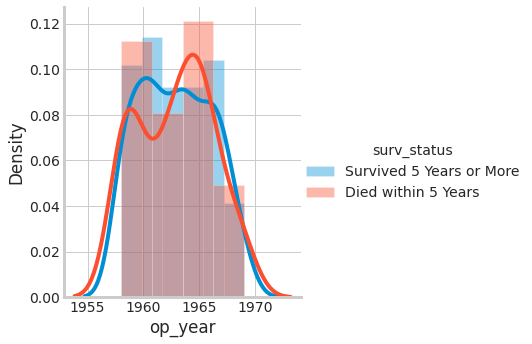

In [27]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue='surv_status', height=5).map(sns.distplot, "op_year").add_legend()
plt.show()

Observations:

1. If the person age is less than ~42 then higher probability of the patient survived more than 5 years. (more than that age , so much overlap with other class )
2. If detected axil nodes detected is less than ~3 then higher probability of the patient survived.

Survived
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
Not Survived
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]


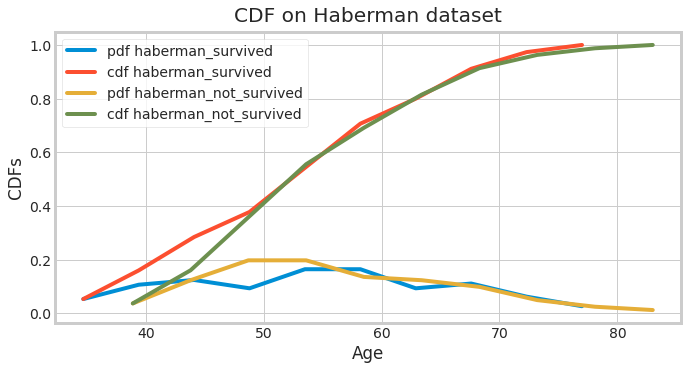

In [39]:
#Cummulative density function
plt.figure(figsize=(10, 5))
#Survived
print("Survived")
counts, bin_edges = np.histogram(haberman_survived["age"], bins = 10, density = True )
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf, label= "pdf haberman_survived")
plt.plot(bin_edges[1:],cdf, label= "cdf haberman_survived")

print("Not Survived")
counts, bin_edges = np.histogram(haberman_not_survived["age"], bins = 10, density = True )
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf, label= "pdf haberman_not_survived")
plt.plot(bin_edges[1:],cdf, label= "cdf haberman_not_survived")
plt.xlabel("Age")
plt.ylabel("CDFs")
plt.legend()
plt.title("CDF on Haberman dataset", pad=10)

plt.show()

Survived
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
Not Survived
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


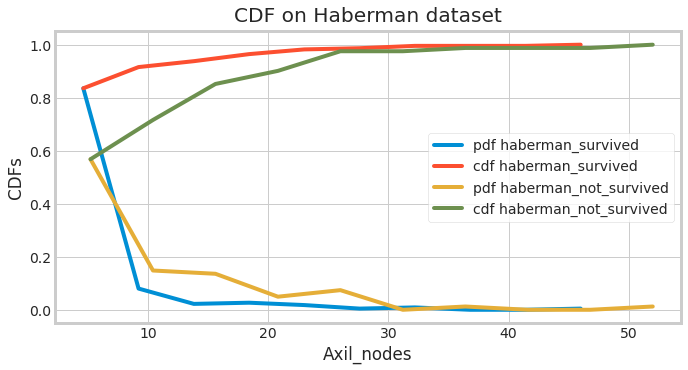

In [40]:
#Cummulative density function
plt.figure(figsize=(10, 5))
#Survived
print("Survived")
counts, bin_edges = np.histogram(haberman_survived["axil_nodes"], bins = 10, density = True )
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf, label= "pdf haberman_survived")
plt.plot(bin_edges[1:],cdf, label= "cdf haberman_survived")

print("Not Survived")
counts, bin_edges = np.histogram(haberman_not_survived["axil_nodes"], bins = 10, density = True )
pdf = counts/sum(counts)
print(pdf)
cdf = np.cumsum(pdf)
print(cdf)
plt.plot(bin_edges[1:],pdf, label= "pdf haberman_not_survived")
plt.plot(bin_edges[1:],cdf, label= "cdf haberman_not_survived")
plt.xlabel("Axil_nodes")
plt.ylabel("CDFs")
plt.legend()
plt.title("CDF on Haberman dataset", pad=10)

plt.show()

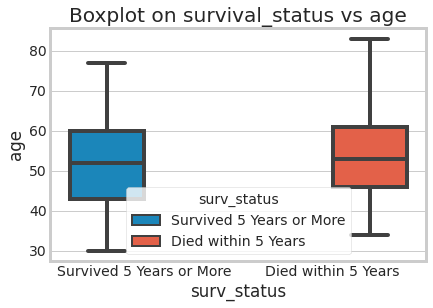

In [49]:
#Box Plot for surv_status vs age

sns.boxplot(x='surv_status', y ='age',data=haberman, hue='surv_status')
plt.title('Boxplot on survival_status vs age')
plt.show()

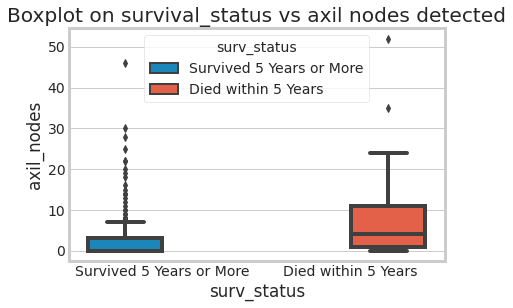

In [50]:
#Box Plot for surv_status vs axilliary_nodes

sns.boxplot(x='surv_status', y ='axil_nodes', data=haberman, hue='surv_status')
plt.title('Boxplot on survival_status vs axil nodes detected')
plt.show()

# **Observations -**

1. 25% of the people survived having age below 42
2. 75% of the people survived having axil_nodes less than 3

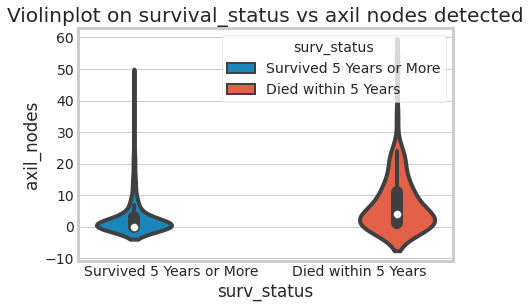

In [53]:
sns.violinplot(x='surv_status', y ='axil_nodes', data=haberman, hue='surv_status', size=6)
plt.title('Violinplot on survival_status vs axil nodes detected')
plt.show()


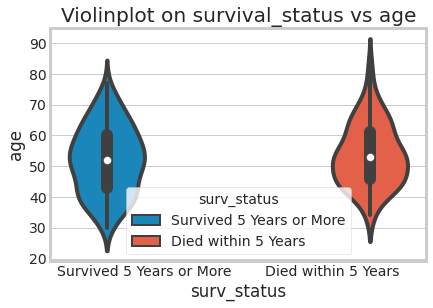

In [54]:
sns.violinplot(x='surv_status', y ='age', data=haberman, hue='surv_status', size=6)
plt.title('Violinplot on survival_status vs age')
plt.show()


# **Observations -**

1. Patients whose age is less than 43 has survival probability higher.
2. As axil nodes increased , probability of survival is reducing.